
#**Customer Churn Prediction**


Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

**We are going to build a basic model for predicting customer churn using Telco Customer Churn dataset**

Let's get started.

# Steps Involved to Predict Customer Churn
- Importing Libraries
- Loading Dataset
- Exploratory Data Analysis
- Cleaning and Transforming Data
    - Rearranging Columns
    - Feature Scaling
    - Feature Selection
- Prediction using Logistic Regression
- Prediction using Support Vector Classifier
- Prediction using Decision Tree Classifier
- Prediction using KNN Classifier

## Importing Libraries

First of all, we will import knwon necessary libraries.

In [ ]:
#import platform
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline

## Loading Dataset
We use pandas to read the dataset and preprocess it.

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

## Exploratory Data Analysis

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:
 - Partner: whether the customer has a partner or not (Yes, No),
 - Dependents: whether the customer has dependents or not (Yes, No),
 - OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
 - tenure: number of months the customer has stayed with the company,
 - MonthlyCharges: the amount charged to the customer monthly,
 - TotalCharges: the total amount charged to the customer.

There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [ ]:
df.size

147903

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Totalcharges is given as object datatype but it is float datatype

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Basic Data Cleaning
As we have already observered in above cell that Totalcharges is given as object datatype but it is float datatype. We will fix it here.

In [ ]:
df['TotalCharges'].dtype

dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [ ]:
df['TotalCharges'].dtype

dtype('float64')

In [ ]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [ ]:
df.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [ ]:
df.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


## Cleaning and Transforming Data

In [ ]:
df.drop(['customerID'],axis = 1,inplace = True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Dropped customerID because it is not needed

In [ ]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

### Rearranging Columns

In [ ]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [ ]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df1.shape

(7043, 31)

In [ ]:
from sklearn.impute import SimpleImputer

# The imputer will replace missing values with the mean of the non-missing values for the respective columns

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

### Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

## Prediction using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
predLR = logmodel.predict(X_test)

In [ ]:
predLR

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
Y_test

5616    0
2937    0
1355    0
5441    1
3333    0
       ..
2797    1
412     0
174     0
5761    0
5895    0
Name: Churn_Yes, Length: 2113, dtype: uint8

In [ ]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



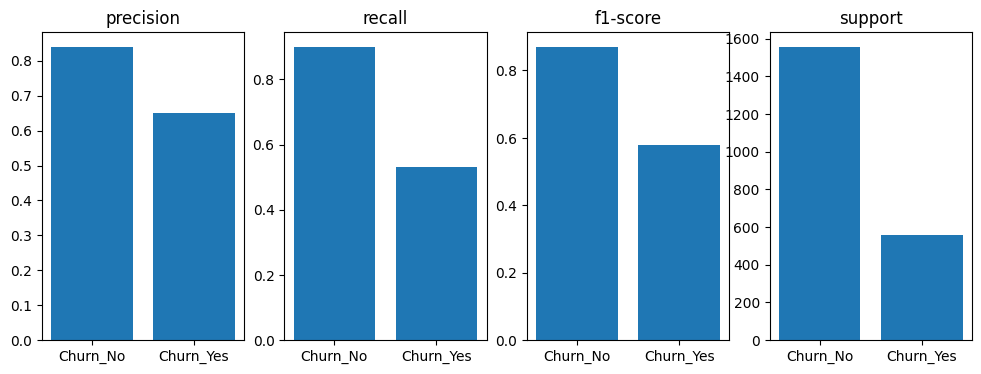

In [ ]:
# calculate the classification report
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

# split the report into lines
lines = report.split('\n')

# split each line into parts
parts = [line.split() for line in lines[2:-5]]

# extract the metrics for each class
class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

# create a bar chart for each metric
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

# display the plot
plt.show()

In [ ]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

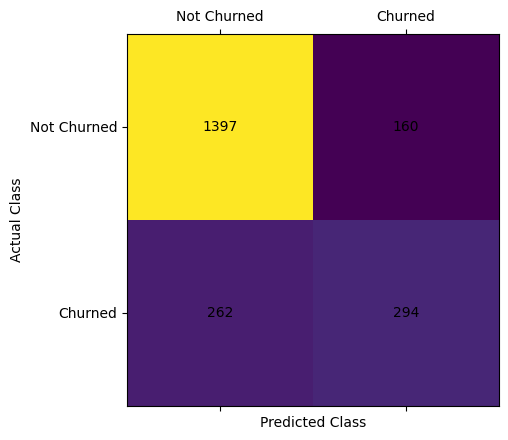

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
logmodel.score(X_train, Y_train)

0.8062880324543611

In [ ]:
accuracy_score(Y_test, predLR)

0.8002839564600095

## Prediction using Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.67      0.48      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

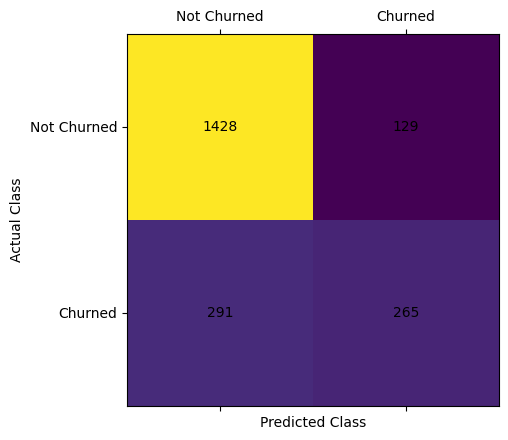

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
svc.score(X_train,Y_train)

0.8170385395537525

In [ ]:
accuracy_score(Y_test, y_pred_svc)

0.8012304779933743

## Prediction using Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1557
           1       0.47      0.48      0.47       556

    accuracy                           0.72      2113
   macro avg       0.64      0.64      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [ ]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

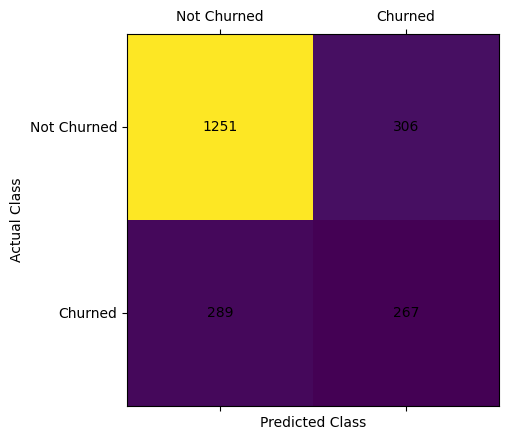

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [ ]:
accuracy_score(Y_test, y_pred_dtc)

0.718409843823947

## Prediction using KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

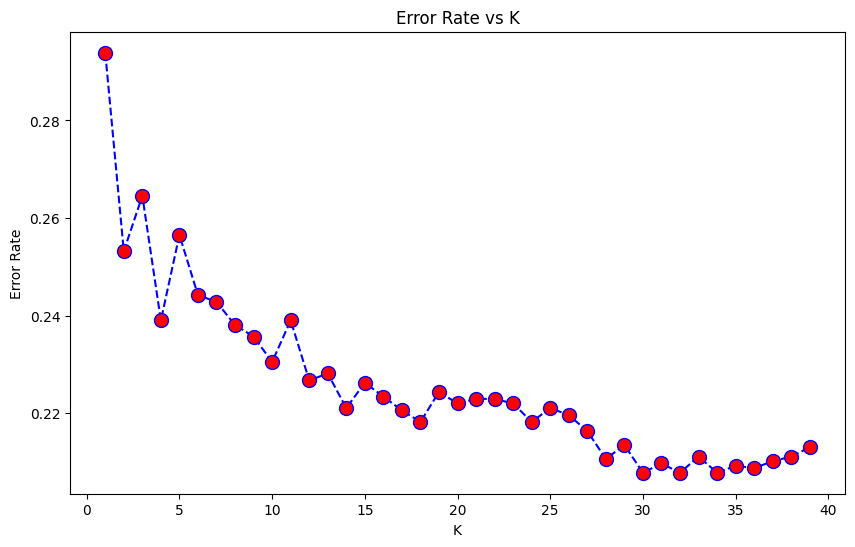

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1557
           1       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [ ]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

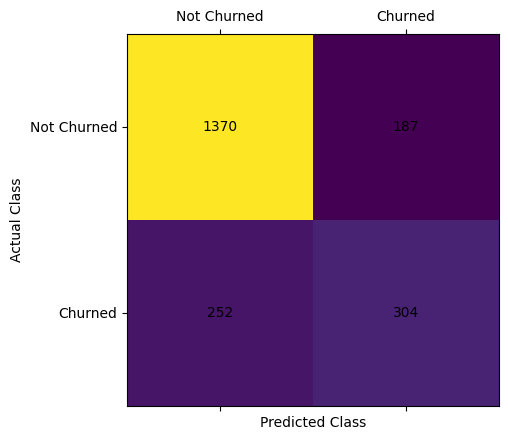

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
knn.score(X_train,Y_train)

0.8008113590263691

In [ ]:
accuracy_score(Y_test, pred_knn)

0.792238523426408